**A1.2 Regresión lineal**

**1.** Se importa la libreria pandas, posterior a esto se carga la base de datos la cual cuenta con una lista de 140 países, cada uno con su nivel de felicidad y producto interno bruto (GDP). Así mismo, se despliegan las primeras 10 filas de dichos datos.

In [2]:
import pandas as pd
data=pd.read_csv('A1.2 Felicidad y GDP.csv')
data.head(10)

,Pais,Felicidad,GDP
0,Finland,7.8210,2.718370e+11
1,Denmark,7.6362,3.560850e+11
2,Iceland,7.5575,2.171808e+10
3,Switzerland,7.5116,7.522480e+11
4,Netherlands,7.4149,9.138650e+11
5,Luxembourg,7.4040,7.335313e+10
6,Sweden,7.3843,5.414870e+11
7,Norway,7.3651,3.621980e+11
8,Israel,7.3638,4.071010e+11
9,New Zealand,7.1998,2.117350e+11


**2.** Se ordena e imprime la columna GDP de menor a mayor.

In [4]:
S1=data.sort_values(by='GDP',ascending=False)
print(S1.head(10))

               Pais  Felicidad           GDP
15    United States     6.9768  2.089370e+13
70            China     5.5853  1.468770e+13
52            Japan     6.0389  5.040110e+12
13          Germany     7.0341  3.846410e+12
16   United Kingdom     6.9425  2.756900e+12
130           India     3.7771  2.667690e+12
19           France     6.6867  2.630320e+12
29            Italy     6.4667  1.892570e+12
14           Canada     7.0251  1.645420e+12
57      South Korea     5.9351  1.637900e+12


**3.** Se repite el mismo proceso anterior sin embargo ahora se ordena la base de datos de mayor a menor GDP.

In [6]:
S2=data.sort_values(by='GDP',ascending=True)
print(S2.head(10))

             Pais  Felicidad           GDP
111       Comoros     4.6086  1.223876e+09
89         Gambia     5.1636  1.830413e+09
135       Lesotho     3.5118  2.250718e+09
93        Liberia     5.1215  3.039983e+09
119      Eswatini     4.3961  3.984841e+09
134  Sierra Leone     3.5740  4.063289e+09
73     Montenegro     5.5468  4.780722e+09
129          Togo     4.1123  7.574637e+09
30         Kosovo     6.4551  7.716925e+09
62     Kyrgyzstan     5.8285  7.780875e+09


**4.** Para realizar los cálculos y gráficos siguientes se importan las bases de datos numpy y matplotlib.pyplot. 
Para tener un mejor manejo de los datos, específicamente la variable "x" siendo la del GDP se expresa como el logaritmo base 10 del GDP.

Por la parte de la regresión lineal, se calculan por a parte los dos coeficientes (beta 1 y beta 0) del modelo de regresión lineal simple. Una vez realizados estos cálculos en excel se imprimen ambos valores. Se genera la ecuación de la regresión lineal una vez ingresados ambos coeficientes. 

Con el objetivo de representar de una manera más visual estos datos y la ecuación, se utiliza un gráfico nombrando ambos ejes con el GDP y Nivel de felicidad. En dicha gráfica se agrega la línea de la ecuación que se ajusta mejor a los datos.

En relación a dichos datos y ecuación se realizan diversos cálculos (todos por a parte) para analizar su comportamiento.

B1= 0.628128466
B0= -1.3024


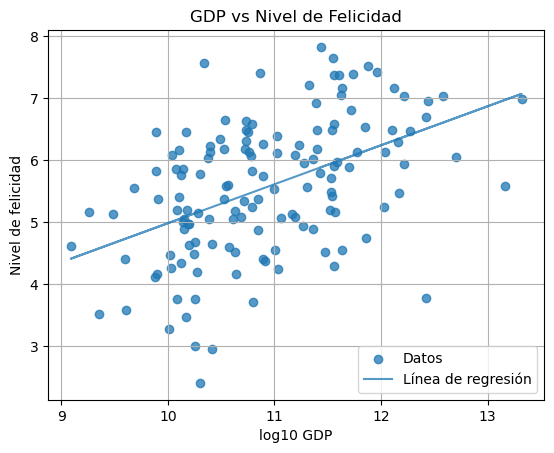

In [8]:
import numpy
import matplotlib.pyplot as plt

data['log10GDP']=numpy.log10(data['GDP'])
x=data['log10GDP']
B1=0.628128466
B0=-1.3024
print("B1=",B1)
print("B0=",B0)
y=B1*x+B0

plt.scatter(data['log10GDP'],data['Felicidad'],alpha=0.75, label='Datos')
plt.xlabel('log10 GDP')
plt.ylabel('Nivel de felicidad')
plt.title('GDP vs Nivel de Felicidad')
plt.plot(x,y,alpha=0.75, label='Línea de regresión')
plt.grid(True)
plt.legend()
plt.show()

**5.** El Residual Sum of Squares como su nombre lo dice es la suma de residuos cuadrados y esto es útil puesto que mide el nivel de varianza en el término de error, donde menor sea el número, mejor es el ajuste del modelo.

In [10]:
RSS=131.3738318
print("RSS=",RSS)

RSS= 131.3738318


**6.** La desviación estándar se incluye para valorar la confianza con que los coeficientes previamente calculados pueden estimar el comportamiento de los datos. Aunado y en base a esto, se establecen los intervalos de confianza de cada uno de los coeficientes.

In [12]:
SE=0.100194848
print("SE=",SE)
CI1=0.487782889,0.768474043
print("CI1=",CI1)
CI2=-1.011360109,-1.593340005
print("CI2=",CI2)

SE= 0.100194848
CI1= (0.487782889, 0.768474043)
CI2= (-1.011360109, -1.593340005)


**7.** El Residual Standard Error es una métrica útil que estima la desviación estándar del error, es decir, el tamaño del error que se encuentra al momento de realizar predicciones al utilizar el modelo. Cuando se tiene un valor pequeño esto indica que las predicciones son muy similares a los valores reales. 

Por último, para calcular la R^2, valor que indica el comportamiento del modelo, primero se utiliza el Total Sum of Squares(TSS) siendo la medida de variación con respecto a la media. Teniendo este valor, y en conjunto conel RSS se obtiene el valor de la R^2.

In [14]:
RSE=0.975696822
print("RSE=",RSE)
TSS=168.7879875
print("TSS=",TSS)
R2=0.221663617
print("R2=",R2)

RSE= 0.975696822
TSS= 168.7879875
R2= 0.221663617


**8.** Finalmente, ya que los cálculos anterores se han realizado a mano por a parte, para verificar que todos estos sean correctos, se hace uso de la funcion OLS(). Para esto es necesario importar statsmodels.api. Se agrega el resumen de los datos, sin embargo para obtener un valor p con más cifras significativas se se utiliza la función pvalues. Así mismo como el resumen no muestra el RSE se utiliza scale**.5 para verificar dicho valor. 

In [16]:
import statsmodels.api as sm
b=sm.add_constant(data['log10GDP'])
result=sm.OLS(data['Felicidad'],b).fit()
print(result.summary())
print("P-values:",result.pvalues)
print("RSE:",result.scale**.5)

                            OLS Regression Results                            
Dep. Variable:              Felicidad   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     39.59
Date:                Sun, 26 Jan 2025   Prob (F-statistic):           3.83e-09
Time:                        17:41:05   Log-Likelihood:                -195.09
No. Observations:                 141   AIC:                             394.2
Df Residuals:                     139   BIC:                             400.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3024      1.094     -1.191      0.2

**Referencias**
 - Helliwell, J. F., Layard, R., Sachs, J. D., De Neve, J.-E., Aknin, L. B., & Wang, S. (Eds.). (2022). World Happiness Report 2022. New York: Sustainable Development Solutions Network.
 - The World Bank. (s. f.). World Bank Open Data. Recuperado 26 de enero de 2025, de https://data.worldbank.org/indicator/NY.GDP.MKTP.CD. 

**Codigo de honor**
Declaro que he realizado esta actividad con integridad académica